# Nuages de mots

## Imports et stopwords

In [11]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/ghost/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [13]:
# Choisir une année
year = 1880

In [14]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f and "RptAn" in f]
txts

['Lkn_1880_Tome_RptAn_Part_8.txt',
 'Lkn_1880_Tome_RptAn_Part_3.txt',
 'Lkn_1880_Tome_RptAn_Part_1.txt',
 'Lkn_1880_Tome_RptAn_Part_4.txt',
 'Lkn_1880_Tome_RptAn_Part_5.txt',
 'Lkn_1880_Tome_RptAn_Part_2.txt',
 'Lkn_1880_Tome_RptAn_Part_6.txt',
 'Lkn_1880_Tome_RptAn_Part_7.txt']

In [15]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [16]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

8

In [17]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"_\n\n45 —\n\nnement. Celte statue représente le génie de la Belgique tenant d'une\nmain une couronne civique et portant de l'autre le drapeau de\nla Belgique renaissante. Le monument a une hauteur totale de"

In [18]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [19]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"_\n\n45 —\n\nnement. Celte statue représente le génie de la Belgique tenant d'une\nmain une couronne civique et portant de l'autre le drapeau de\nla Belgique renaissante. Le monument a une hauteur totale de\n45 mètres.\nCe monument est l'œuvre de M . l'architecte De Curte; il a été\nexécuté par M . Delfosse.\nLe massif de maçonnerie sur lequel repose le monument a\n16 mètres de profondeur; il a coûté 80,000 francs.\nL'édifice entier coûte 700,000 francs.\nNous ne quitterons pas ce sujet sans exprimer cette p"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [20]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [21]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1880_clean.txt!'

In [22]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'nement celte statue représente génie belgique tenant main couronne civique portant drapeau belgique renaissante monument hauteur totale mètres monument œuvre architecte curte exécuté delfosse massif maçonnerie lequel repose monument mètres profondeur coûté francs édifice entier coûte francs quitterons sujet exprimer pensée parc public attirera nombreux visiteurs belle saison augmentera sensiblement circulation profit développement matériel moral commune collège donné dénominations bue archiduc b'

## Nuage de mots

### Afficher les termes les plus fréquents


In [23]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rue', 887), ('commune', 782), ('laeken', 482), ('conseil', 387), ('vol', 372), ('francs', 334), ('travaux', 328), ('administration', 327), ('école', 326), ('den', 322)]


### Créer, stocker et afficher le nuage de mots

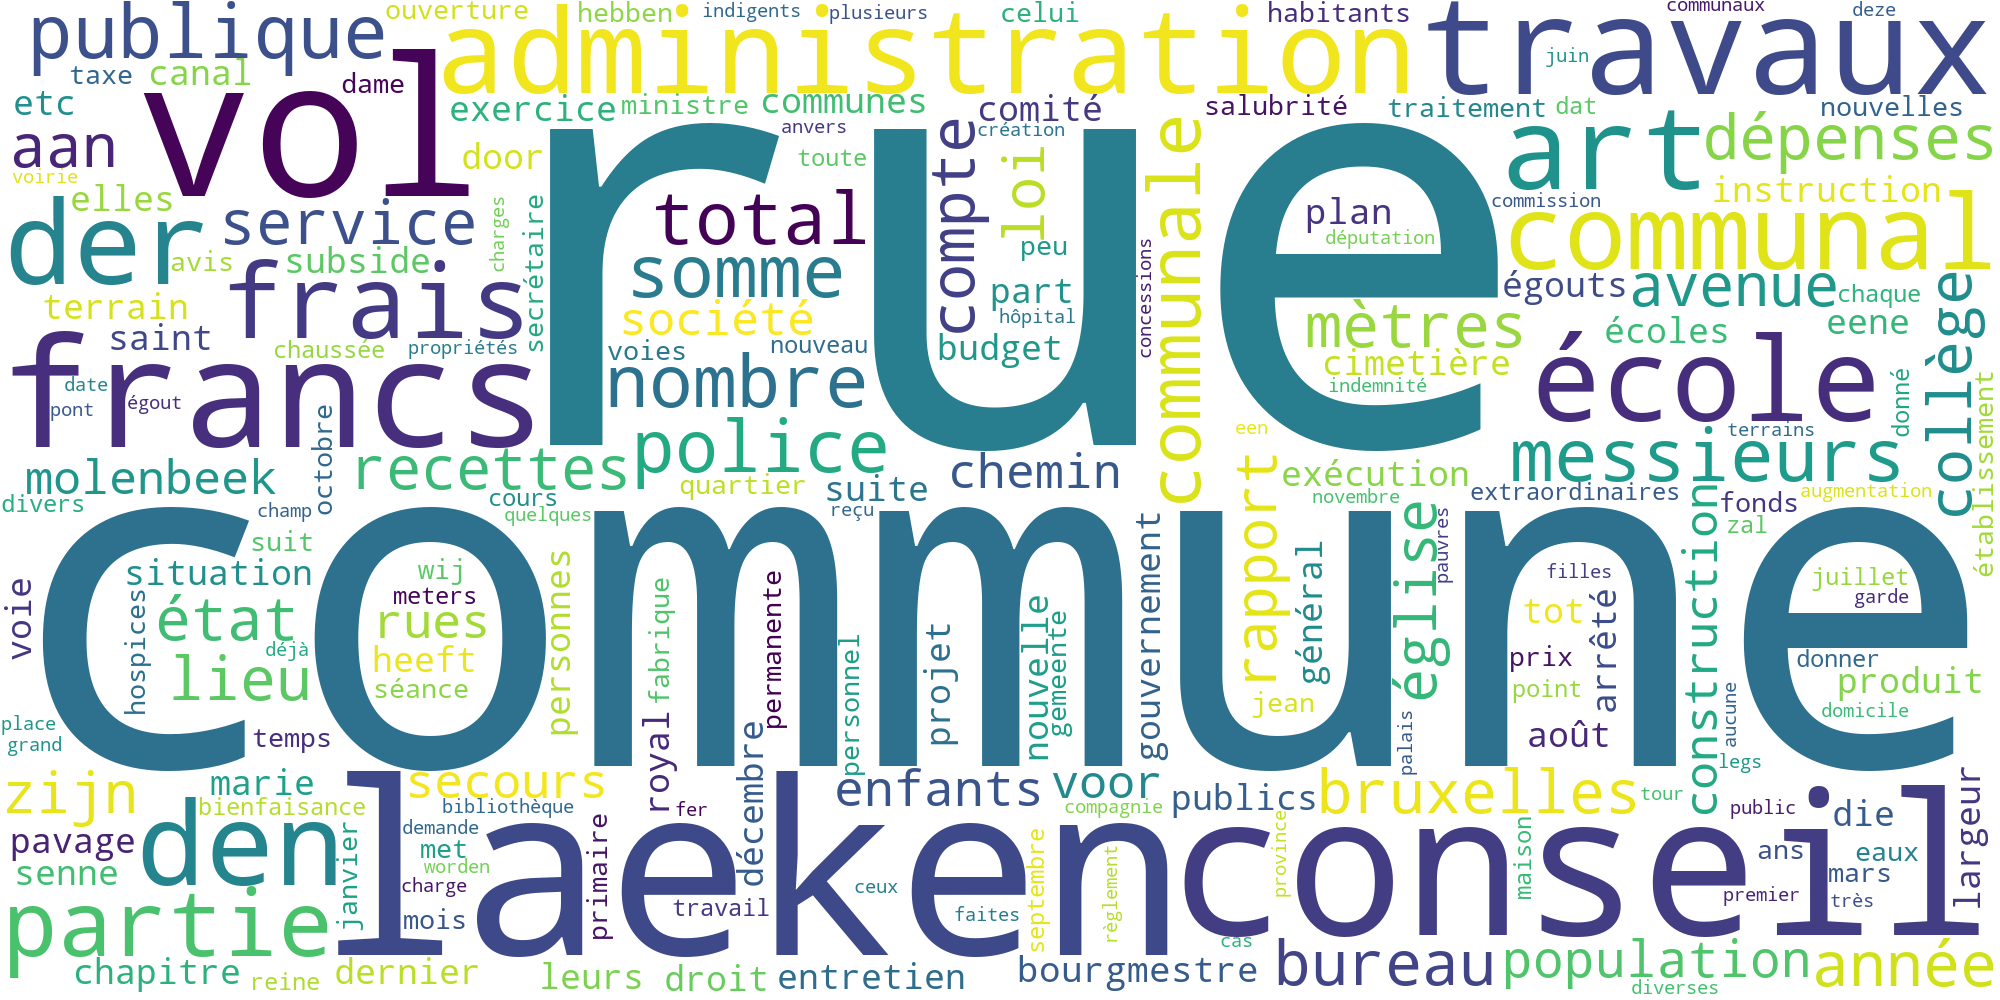

In [24]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))